In [1]:
!pip install matplotlib





[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[1 0 1 0 1 0 1 2 1 0 2 0 1 1 2 1 2 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0]


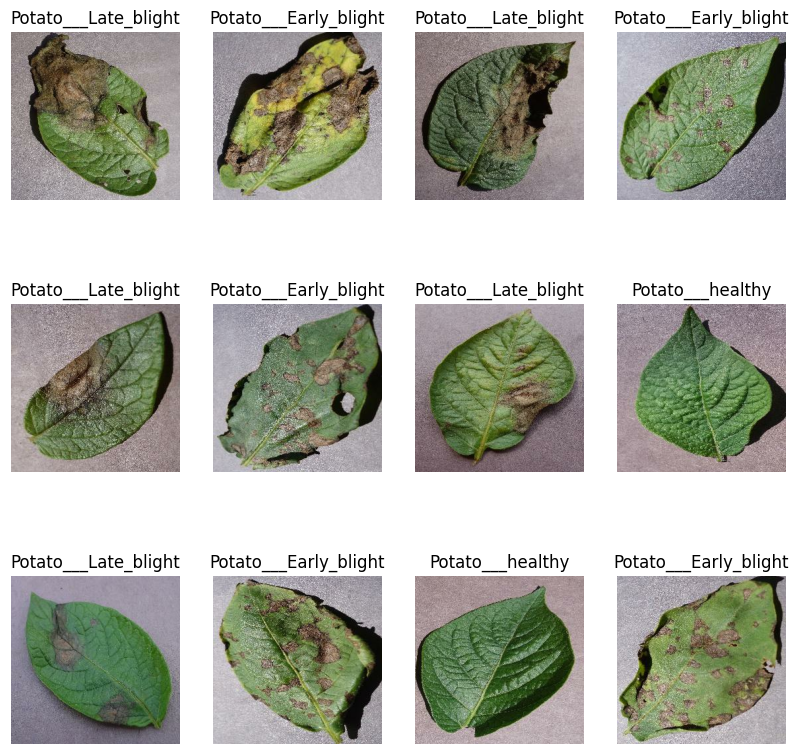

In [6]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
80% ==> Traning
10% ==> Validation
10% ==> Test

SyntaxError: invalid syntax (2079534221.py, line 1)

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54) 
len(test_ds)

14

In [11]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+val_split+test_split) ==1

    ds_size=len(ds)

    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)

    train_size= int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
    

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
  for image_batch, labels_batch in dataset.take(1):
      print(image_batch[0].numpy()/255)

[[[0.7490196  0.7294118  0.75686276]
  [0.74509805 0.7254902  0.7529412 ]
  [0.7529412  0.73333335 0.7607843 ]
  ...
  [0.7882353  0.7764706  0.8117647 ]
  [0.75686276 0.74509805 0.78039217]
  [0.72156864 0.70980394 0.74509805]]

 [[0.77254903 0.7529412  0.78039217]
  [0.7647059  0.74509805 0.77254903]
  [0.76862746 0.7490196  0.7764706 ]
  ...
  [0.7764706  0.7647059  0.8       ]
  [0.7490196  0.7372549  0.77254903]
  [0.7176471  0.7058824  0.7411765 ]]

 [[0.78039217 0.7607843  0.7882353 ]
  [0.76862746 0.7490196  0.7764706 ]
  [0.7647059  0.74509805 0.77254903]
  ...
  [0.7647059  0.7529412  0.7882353 ]
  [0.7411765  0.7294118  0.7647059 ]
  [0.7176471  0.7058824  0.7411765 ]]

 ...

 [[0.60784316 0.5803922  0.60784316]
  [0.6392157  0.6117647  0.6392157 ]
  [0.64705884 0.61960787 0.64705884]
  ...
  [0.5568628  0.54509807 0.57254905]
  [0.5294118  0.5176471  0.54509807]
  [0.58431375 0.57254905 0.6       ]]

 [[0.627451   0.6        0.627451  ]
  [0.63529414 0.60784316 0.63529414]


In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [23]:
BATCH_SIZE

32

In [24]:

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # Exclude BATCH_SIZE
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),  # Set input_shape here
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),    
])

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [35]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    verbose=1 
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.9685 - loss: 0.0768 - val_accuracy: 0.9740 - val_loss: 0.0668
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.9712 - loss: 0.0783 - val_accuracy: 0.9792 - val_loss: 0.0643
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.9819 - loss: 0.0508 - val_accuracy: 0.9948 - val_loss: 0.0214
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9705 - loss: 0.0827 - val_accuracy: 0.9844 - val_loss: 0.0482
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9721 - loss: 0.0716 - val_accuracy: 0.9688 - val_loss: 0.0804
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.9820 - loss: 0.0492 - val_accuracy: 0.9792 - val_loss: 0.0715
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.9808 - loss: 0.0473 - val_accuracy: 0.9323 - val_loss: 0.2028
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.9811 - loss: 0.0455 - val_accuracy: 0.9896 - v

In [37]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 685ms/step - accuracy: 0.9718 - loss: 0.1116


In [29]:
scores

[0.059008628129959106, 0.97265625]

First image to predict
Actual Lable: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Label: Potato___Late_blight


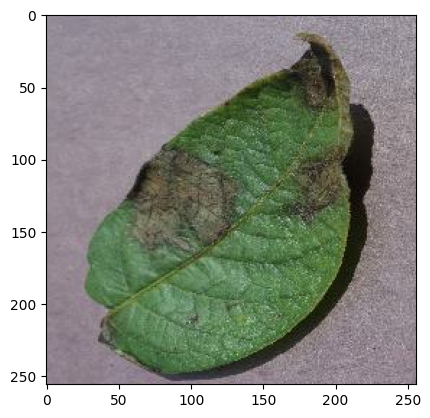

In [30]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Lable:",class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


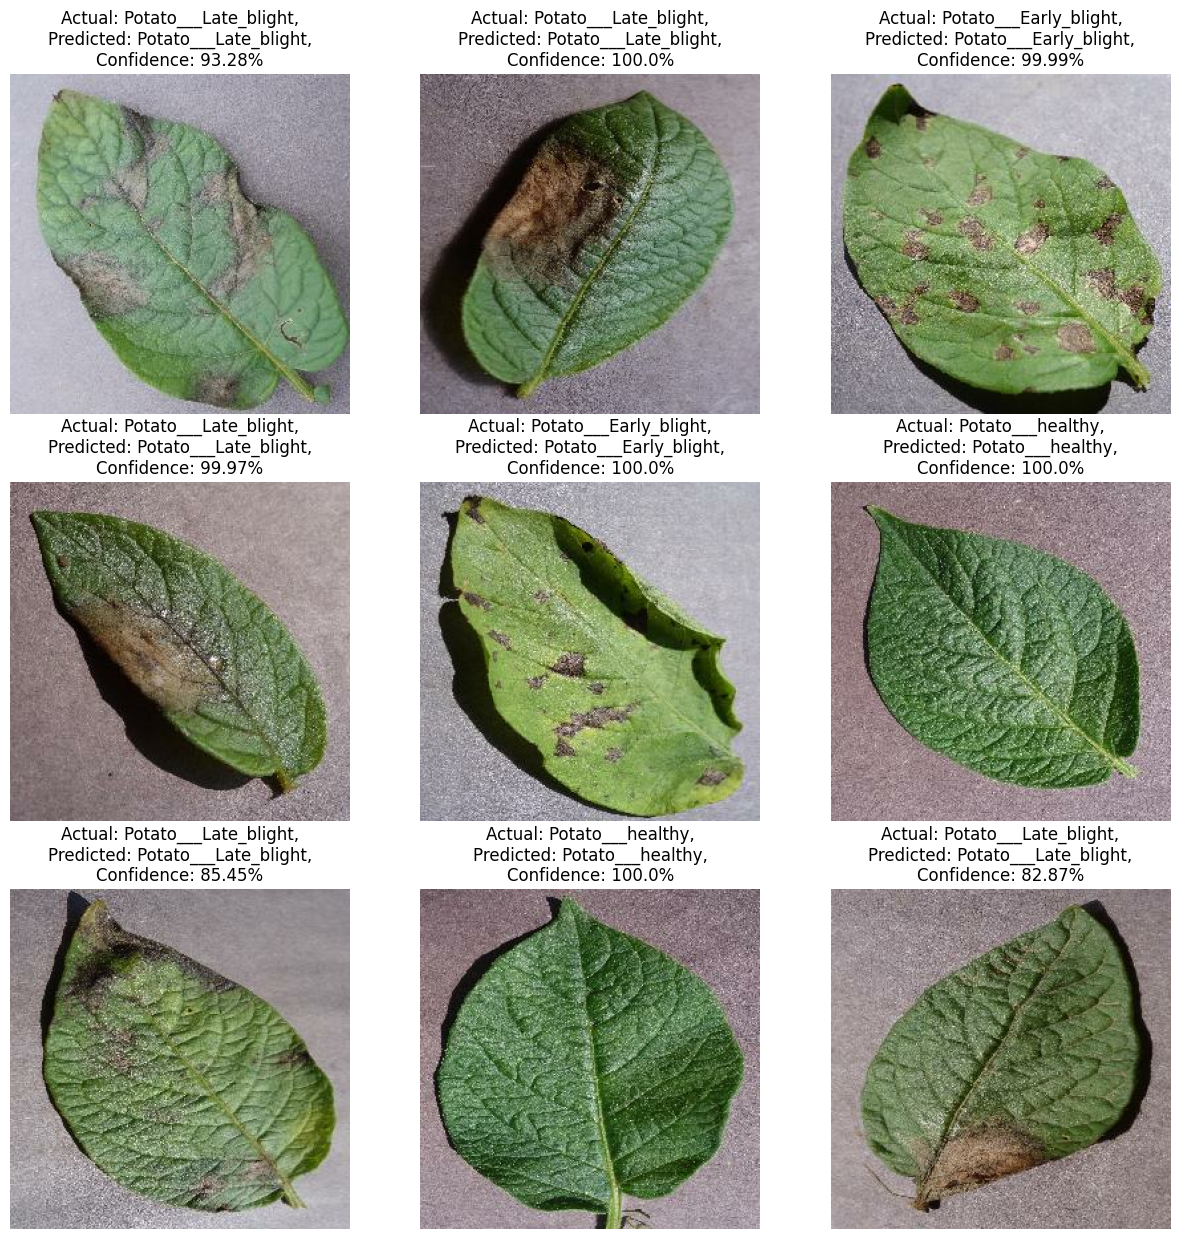

In [38]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidance = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidance}%")
        plt.axis("off")

In [33]:
model_version = 1
model.save(f"../models/{model_version}.keras")
